# Task 3: Optimization and new Baseline Model

After the feedback we got from Task 2, we did a little bit of reworking to optimize our linear regression Model, before we 
tackle Task 3.

Some of our Optimization includes:

    -Removed temp and kept atemp during feature selection, as using both would create issues with multicorrelation.
    -remove the 'casual' and 'registered' labels, because we only use 'cnt'
    -checked out how 'mnth' is distributed ? (Anectode from the lecture)
    -kept 'instant', because its relevant apparently
    
Since we changed our dataset, we also tested our Models again to compare if the Model improved.

<div style="width:100%;height:30px;background-color:#E31134"></div>
    

## 0. Importing Requirements

In [1]:
# importing libraries
import pandas as pd
from sklearn import linear_model
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer

## 1. Baseline linear regression model

In [2]:
# Loading the train and test data
train_df = pd.read_csv('new_traindata.csv', delimiter=',')
test_df = pd.read_csv('new_testdata.csv', delimiter=',')

### 1.2. Features/Label - Train/Test Split

In [3]:
# Splitting the train data into features and labels
train_features = train_df.iloc[:, :13]
train_labels = train_df.iloc[:, -1:]

# Splitting the test data into features and labels
test_features = test_df.iloc[:, :13]
test_labels = test_df.iloc[:, -1:]

In [4]:
#comment any of these out to check the content

train_features
# train_labels
# test_features
# test_labels

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,windspeed,leaflets,price reduction,cnt
0,154,2.0,0,6,0,0,1,1,0.587133,0.161118,991,0,5312
1,685,4.0,1,11,0,6,1,2,0.324492,0.114392,601,0,5445
2,368,1.0,1,1,0,1,1,1,0.126275,0.198321,549,0,2236
3,472,2.0,1,4,1,0,0,1,0.614925,0.172953,740,0,6370
4,442,1.0,1,3,0,1,0,2,0.505046,0.089160,773,1,7836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
591,78,1.0,0,3,0,2,0,1,0.466525,0.199010,1022,1,3117
592,81,1.0,0,3,0,5,1,1,0.440642,0.149874,551,0,2703
593,377,1.0,1,1,0,3,1,2,0.381938,0.129101,520,0,4097
594,299,4.0,0,10,0,2,1,2,0.472846,0.111974,605,0,3894


### 1.3. Linear Regresion

In [5]:
# Model building

# We use linear regression, which is a supervised learning technique 
# with usage of labeled training data.
baseline_model = linear_model.LinearRegression()

baseline_model.fit(train_features, train_labels)

print(baseline_model.coef_)

[[-1.10386653e-14  5.61550806e-13  3.03102389e-12  1.43078474e-13
   5.03011202e-14  3.47815106e-15  2.15030238e-13  2.34291183e-13
   2.14893380e-12  1.99470826e-13 -6.24500451e-17  8.18145736e-15
   1.00000000e+00]]


In [6]:
# Predict all test examples
baseline_pred = baseline_model.predict(test_features)
baseline_pred

array([[ 3894.],
       [ 5936.],
       [ 5629.],
       [ 3310.],
       [ 4748.],
       [ 1450.],
       [ 7040.],
       [ 6778.],
       [ 5119.],
       [ 4332.],
       [ 5115.],
       [ 6598.],
       [ 2496.],
       [ 5464.],
       [ 6118.],
       [ 7580.],
       [ 6883.],
       [ 2432.],
       [ 5375.],
       [ 6227.],
       [ 7852.],
       [ 1115.],
       [ 4687.],
       [ 2056.],
       [ 4484.],
       [ 5302.],
       [ 4220.],
       [ 4911.],
       [ 6734.],
       [ 3873.],
       [ 6234.],
       [ 7105.],
       [ 7538.],
       [ 4507.],
       [ 1421.],
       [ 4367.],
       [ 1817.],
       [ 2134.],
       [ 2431.],
       [ 5202.],
       [ 5538.],
       [ 1550.],
       [ 2485.],
       [ 4342.],
       [ 4036.],
       [  683.],
       [ 3644.],
       [ 7534.],
       [ 4541.],
       [ 5499.],
       [ 7363.],
       [ 4401.],
       [ 7592.],
       [ 3387.],
       [ 3523.],
       [ 5102.],
       [ 5698.],
       [ 3577.],
       [ 5668.

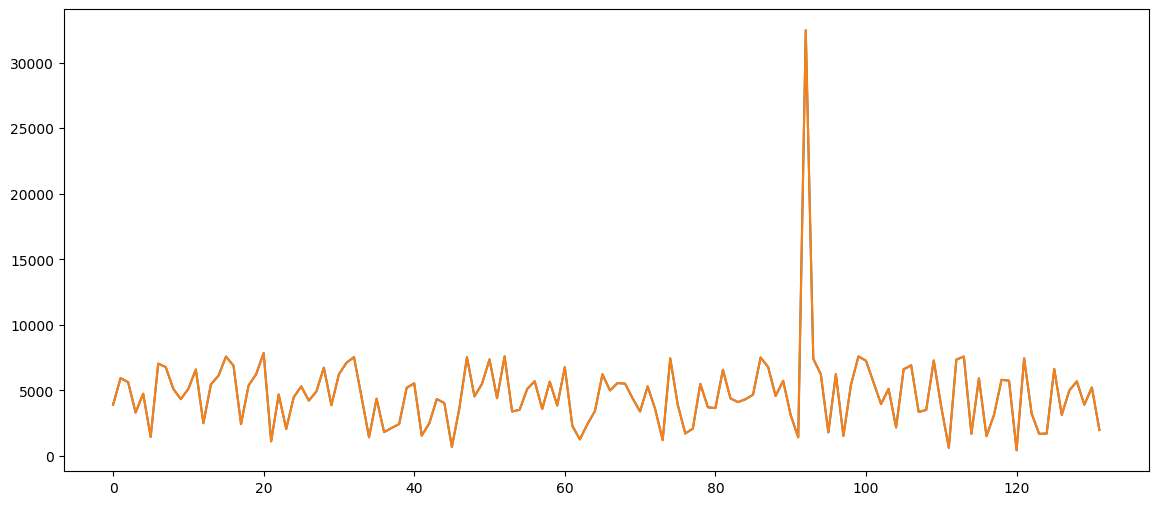

In [7]:
# Visualize the output
plt.figure(figsize=(14,6))
plt.plot(test_labels)
plt.plot(baseline_pred)

In [8]:
print(f"Predict label for following example:\n{test_features.iloc[0,:]}")

#Predict a single value
predicted_value = baseline_model.predict([test_features.iloc[0,:]])[0]

print("\nPredicted label: ",predicted_value)
print("Actual label:", test_labels.iloc[0])
print("Deviation predicted from actual value: ",predicted_value - test_labels.iloc[0])

Predict label for following example:
instant             299.000000
season                4.000000
yr                    0.000000
mnth                 10.000000
holiday               0.000000
weekday               2.000000
workingday            1.000000
weathersit            2.000000
atemp                 0.472846
windspeed             0.120161
leaflets            605.000000
price reduction       0.000000
cnt                3894.000000
Name: 0, dtype: float64

Predicted label:  [3894.]
Actual label: cnt    3894
Name: 0, dtype: int64
Deviation predicted from actual value:  cnt    0.0
Name: 0, dtype: float64


In [9]:
print(round(baseline_pred[:10] - test_labels.iloc[0:10])*100000, 2)

   cnt
0  0.0
1 -0.0
2 -0.0
3 -0.0
4  0.0
5 -0.0
6  0.0
7  0.0
8  0.0
9  0.0 2


### 1.4. Evaluate Baseline model

In [10]:
# Evaluate model

#Return Mean Absolute Error -> Loss: The beste Value is 0.0
mae = mean_absolute_error(test_labels, baseline_pred)
print('MAE: %.3f' % mae)

#Return the coefficient of determination R^2 of the prediction -> Score: best possible value is 1.0
print("R^2 value of the model: ",baseline_model.score(test_features, test_labels))

MAE: 0.000
R^2 value of the model:  1.0
